In [ ]:
import sys
sys.path.insert(0,'')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
import pandas as pd
driver = webdriver.Chrome('/Users/DRNPRO/Documents/chromedriver', options=chrome_options)
driver.get('https://www.beeradvocate.com/beer/top-rated/')

In [1]:
import wrds
db = wrds.Connection()

Enter your WRDS username [DRNPRO]:nikoldy
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [19]:
#!pip install yfinance

import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt
    
# Create our portfolio of equities
tickers = ['AAPL','FB', 'C', 'DIS']
 
# Set the investment weights (I arbitrarily picked for example)
weights = np.array([.25, .3, .15, .3])
 
# Set an initial investment level
initial_investment = 1000000
 
# Download closing prices
data = pdr.get_data_yahoo(tickers, start="2018-01-01", end=dt.date.today())['Close']
 
#From the closing prices, calculate periodic returns
returns = data.pct_change()

returns

Symbols,AAPL,FB,C,DIS
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.017914,0.003093,0.004293
2018-01-04,0.004645,-0.001841,0.012334,-0.000445
2018-01-05,0.011385,0.013671,-0.001324,-0.005435
2018-01-08,-0.003714,0.007653,-0.011670,-0.014334
...,...,...,...,...
2020-10-12,0.063521,0.042730,0.021144,-0.000080
2020-10-13,-0.026527,0.001414,-0.047951,0.031928
2020-10-14,0.000743,-0.015644,-0.014881,-0.018378


In [6]:
# Generate Var-Cov matrix
cov_matrix = returns.cov()
cov_matrix

Symbols,AAPL,FB,C,DIS
Symbols,,,,
AAPL,0.000495,0.000327,0.000341,0.000238
FB,0.000327,0.000570,0.000310,0.000220
C,0.000341,0.000310,0.000763,0.000376
DIS,0.000238,0.000220,0.000376,0.000405


In [7]:
# Calculate mean returns for each stock
avg_rets = returns.mean()
 
# Calculate mean returns for portfolio overall, 
# using dot product to 
# normalize individual means against investment weights
 # https://en.wikipedia.org/wiki/Dot_product#:~:targetText=In%20mathematics%2C%20the%20dot%20product,and%20returns%20a%20single%20number.
port_mean = avg_rets.dot(weights)
 
# Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
 
# Calculate mean of investment
mean_investment = (1+port_mean) * initial_investment
             
# Calculate standard deviation of investmnet
stdev_investment = initial_investment * port_stdev

In [17]:
# Select our confidence interval (I'll choose 95% here)
conf_level1 = 0.05

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
# as calculated above
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [9]:
#Finally, we can calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
var_1d1
#output
#22347.7792230231

29941.031705345144

1 day VaR @ 95% confidence: 29941.03
2 day VaR @ 95% confidence: 42343.01
3 day VaR @ 95% confidence: 51859.39
4 day VaR @ 95% confidence: 59882.06
5 day VaR @ 95% confidence: 66950.18
6 day VaR @ 95% confidence: 73340.25
7 day VaR @ 95% confidence: 79216.52
8 day VaR @ 95% confidence: 84686.03
9 day VaR @ 95% confidence: 89823.1
10 day VaR @ 95% confidence: 94681.86
11 day VaR @ 95% confidence: 99303.17
12 day VaR @ 95% confidence: 103718.78
13 day VaR @ 95% confidence: 107953.93
14 day VaR @ 95% confidence: 112029.08
15 day VaR @ 95% confidence: 115961.12


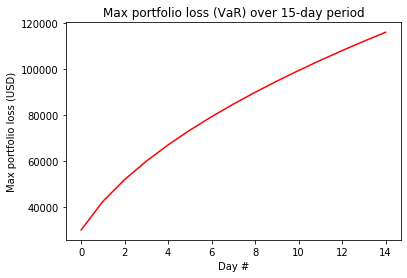

In [15]:
# Calculate n Day VaR
import matplotlib.pyplot as plt

var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")

/Applications/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:309: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


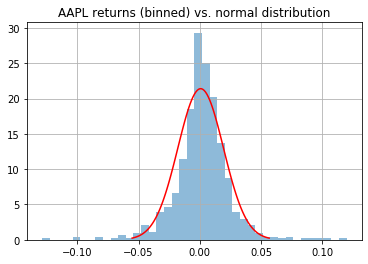

In [18]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy

# Repeat for each equity in portfolio
returns['AAPL'].hist(bins=40, normed=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("AAPL returns (binned) vs. normal distribution")
plt.show()

In [25]:
!git clone git://github.com/seme0021/python-zillow.git
!cd python-zillow

Cloning into 'python-zillow'...
remote: Enumerating objects: 181, done.
remote: Total 181 (delta 0), reused 0 (delta 0), pack-reused 181
Receiving objects: 100% (181/181), 41.32 KiB | 755.00 KiB/s, done.
Resolving deltas: 100% (90/90), done.


In [28]:
!virtualenv env


created virtual environment CPython3.7.6.final.0-64 in 5015ms
  creator CPython3Posix(dest=/Users/DRNPRO/Documents/GitHub/Dub-Hacks-2020/env, clear=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/Users/DRNPRO/Library/Application Support/virtualenv)
    added seed packages: pip==20.2.3, setuptools==50.3.0, wheel==0.35.1
  activators BashActivator,CShellActivator,FishActivator,PowerShellActivator,PythonActivator,XonshActivator


In [29]:
! source env/bin/activate


In [32]:
!pip install nose

In [69]:
! virtualenv env

created virtual environment CPython3.7.6.final.0-64 in 1299ms
  creator CPython3Posix(dest=/Users/DRNPRO/Documents/GitHub/Dub-Hacks-2020/env, clear=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/Users/DRNPRO/Library/Application Support/virtualenv)
    added seed packages: pip==20.2.3, setuptools==50.3.0, wheel==0.35.1
  activators BashActivator,CShellActivator,FishActivator,PowerShellActivator,PythonActivator,XonshActivator


In [70]:
! source /Users/DRNPRO/Documents/GitHub/Dub-Hacks-2020/env/bin/activate


In [72]:
!make test


make: *** No rule to make target `test'.  Stop.


In [73]:
!make coverage


make: *** No rule to make target `coverage'.  Stop.


In [86]:
#!pip install python-zillow

import zillow
key = 'X1-ZWz1i1pylzearv_8tgid'
api = zillow.ValuationApi()

In [87]:
address = "2841 San Gabriel Street, Austin, TX"
postal_code = "78705"

data = api.GetSearchResults(key, address, postal_code)

ZillowError: {'message': 'Zillow did not return a valid response: <?xml version="1.0" encoding="utf-8"?><SearchResults:searchresults xsi:schemaLocation="http://www.zillow.com/static/xsd/SearchResults.xsd https://www.zillowstatic.com/vstatic/80d5e73/static/xsd/SearchResults.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:SearchResults="http://www.zillow.com/static/xsd/SearchResults.xsd"><request><address></address><citystatezip></citystatezip></request><message><text>Error: this account is not authorized to execute this API call</text><code>6</code></message></SearchResults:searchresults><!-- H:001  T:2ms  S:150  R:Sat Oct 17 15:59:13 PDT 2020  B:5.0.66180-master.b6c2130~delivery_ready.7ab249bc -->'}

In [ ]:
GetSearchResults(address, citystatezip = address,
  rentzestimate = FALSE, zws_id = getOption("ZillowR-zws_id"),
  url = "http://www.zillow.com/webservice/GetSearchResults.htm")

In [82]:
GetSearchResults(address = '2114 Bigelow Ave', citystatezip = 'Seattle, WA')


NameError: name 'GetSearchResults' is not defined

In [83]:
import requests
import xmltodict

try:
    # python 3
    from urllib.parse import urlparse, urlunparse, urlencode
except ImportError:
    from urlparse import urlparse, urlunparse
    from urllib import urlencode

from .error import ZillowError
from .place import Place


class ValuationApi(object):
    """
    A python interface into the Zillow API
    By default, the Api caches results for 1 minute.
    Example usage:
      To create an instance of the zillow.ValuationApi class:
        >>> import zillow
        >>> api = zillow.ValuationApi()
    All available methods include:
        >>> data = api.GetSearchResults("<your key here>", "<your address here>", "<your zip here>")
    """
    def __init__(self):
        self.base_url = "https://www.zillow.com/webservice"
        self._input_encoding = None
        self._request_headers=None
        self.__auth = None
        self._timeout = None

    def GetSearchResults(self, zws_id, address, citystatezip, retnzestimate=False):
        """
        The GetSearchResults API finds a property for a specified address.
        The content returned contains the address for the property or properties as well as the Zillow Property ID (ZPID) and current Zestimate.
        It also includes the date the Zestimate was computed, a valuation range and the Zestimate ranking for the property within its ZIP code.
        The GetSearchResults API Web Service is located at: http://www.zillow.com/webservice/GetSearchResults.htm
        :param zws_id: The Zillow Web Service Identifier. Each subscriber to Zillow Web Services is uniquely identified by an ID sequence and every request to Web services requires this ID.
        :param address: The address of the property to search. This string should be URL encoded.
        :param citystatezip: The city+state combination and/or ZIP code for which to search. This string should be URL encoded. Note that giving both city and state is required. Using just one will not work.
        :param retnzestimat: Return Rent Zestimate information if available (boolean true/false, default: false)
        :return:
        """
        url = '%s/GetSearchResults.htm' % (self.base_url)
        parameters = {'zws-id': zws_id}
        if address and citystatezip:
            parameters['address'] = address
            parameters['citystatezip'] = citystatezip
        else:
            raise ZillowError({'message': "Specify address and citystatezip."})
        if retnzestimate:
            parameters['retnzestimate'] = 'true'

        resp = self._RequestUrl(url, 'GET', data=parameters)
        data = resp.content.decode('utf-8')

        xmltodict_data = xmltodict.parse(data)

        place = Place()
        try:
            place.set_data(xmltodict_data.get('SearchResults:searchresults', None)['response']['results']['result'])
        except:
            raise ZillowError({'message': "Zillow did not return a valid response: %s" % data})

        return place

    def GetZEstimate(self, zws_id, zpid, retnzestimate=False):
        """
        The GetZestimate API will only surface properties for which a Zestimate exists.
        If a request is made for a property that has no Zestimate, an error code is returned.
        Zillow doesn't have Zestimates for all the homes in its database.
        For such properties, we do have tax assessment data, but that is not provided through the API.
        For more information, see our Zestimate coverage.
        :zws_id: The Zillow Web Service Identifier.
        :param zpid: The address of the property to search. This string should be URL encoded.
        :param retnzestimate: Return Rent Zestimate information if available (boolean true/false, default: false)
        :return:
        """
        url = '%s/GetZestimate.htm' % (self.base_url)
        parameters = {'zws-id': zws_id,
                      'zpid': zpid}
        if retnzestimate:
            parameters['retnzestimate'] = 'true'

        resp = self._RequestUrl(url, 'GET', data=parameters)
        data = resp.content.decode('utf-8')

        xmltodict_data = xmltodict.parse(data)

        place = Place()
        try:
            place.set_data(xmltodict_data.get('Zestimate:zestimate', None)['response'])
        except:
            raise ZillowError({'message': "Zillow did not return a valid response: %s" % data})

        return place

    def GetDeepSearchResults(self, zws_id, address, citystatezip, retnzestimate=False):
        """
        The GetDeepSearchResults API finds a property for a specified address.
        The result set returned contains the full address(s), zpid and Zestimate data that is provided by the GetSearchResults API.
        Moreover, this API call also gives rich property data like lot size, year built, bath/beds, last sale details etc.
        :zws_id: The Zillow Web Service Identifier.
        :param address: The address of the property to search. This string should be URL encoded.
        :param citystatezip: The city+state combination and/or ZIP code for which to search.
        :param retnzestimate: Return Rent Zestimate information if available (boolean true/false, default: false)
        :return:
        Example:
        """
        url = '%s/GetDeepSearchResults.htm' % (self.base_url)
        parameters = {'zws-id': zws_id,
                      'address': address,
                      'citystatezip': citystatezip
                      }

        if retnzestimate:
            parameters['retnzestimate'] = 'true'

        resp = self._RequestUrl(url, 'GET', data=parameters)
        data = resp.content.decode('utf-8')

        xmltodict_data = xmltodict.parse(data)

        place = Place(has_extended_data=True)
        try:
            place.set_data(xmltodict_data.get('SearchResults:searchresults', None)['response']['results']['result'])
        except:
            raise ZillowError({'message': "Zillow did not return a valid response: %s" % data})

        return place

    def GetDeepComps(self, zws_id, zpid, count=10, rentzestimate=False):
        """
        The GetDeepComps API returns a list of comparable recent sales for a specified property.
        The result set returned contains the address, Zillow property identifier, and Zestimate for the comparable
        properties and the principal property for which the comparables are being retrieved.
        This API call also returns rich property data for the comparables.
        :param zws_id: The Zillow Web Service Identifier.
        :param zpid: The address of the property to search. This string should be URL encoded.
        :param count: The number of comparable recent sales to obtain (integer between 1 and 25)
        :param rentzestimate: Return Rent Zestimate information if available (boolean true/false, default: false)
        :return:
        Example
            >>> data = api.GetDeepComps("<your key here>", 2100641621, 10)
        """
        url = '%s/GetDeepComps.htm' % (self.base_url)
        parameters = {'zws-id': zws_id,
                      'zpid': zpid,
                      'count': count}
        if rentzestimate:
            parameters['rentzestimate'] = 'true'

        resp = self._RequestUrl(url, 'GET', data=parameters)
        data = resp.content.decode('utf-8')

        # transform the data to an dict-like object
        xmltodict_data = xmltodict.parse(data)

        # get the principal property data
        principal_place = Place()
        principal_data = xmltodict_data.get('Comps:comps')['response']['properties']['principal']

        try:
            principal_place.set_data(principal_data)
        except:
            raise ZillowError({'message': 'No principal data found: %s' % data})

        # get the comps property_data
        comps = xmltodict_data.get('Comps:comps')['response']['properties']['comparables']['comp']

        comp_places = []
        for datum in comps:
            place = Place()
            try:
                place.set_data(datum)
                comp_places.append(place)
            except:
                raise ZillowError({'message': 'No valid comp data found %s' % datum})

        output = {
            'principal': principal_place,
            'comps': comp_places
        }

        return output

    def GetComps(self, zws_id, zpid, count=25, rentzestimate=False):
        """
        The GetComps API returns a list of comparable recent sales for a specified property.
        The result set returned contains the address, Zillow property identifier,
        and Zestimate for the comparable properties and the principal property for which the comparables are being retrieved.
        :param zpid: The address of the property to search. This string should be URL encoded.
        :param count: The number of comparable recent sales to obtain (integer between 1 and 25)
        :param retnzestimate: Return Rent Zestimate information if available (boolean true/false, default: false)
        :return:
        """
        url = '%s/GetComps.htm' % (self.base_url)
        parameters = {'zws-id': zws_id,
                      'zpid': zpid,
                      'count': count}
        if rentzestimate:
            parameters['rentzestimate'] = 'true'

        resp = self._RequestUrl(url, 'GET', data=parameters)
        data = resp.content.decode('utf-8')

        # transform the data to an dict-like object
        xmltodict_data = xmltodict.parse(data)

        # get the principal property data
        principal_place = Place()
        principal_data = xmltodict_data.get('Comps:comps')['response']['properties']['principal']

        try:
            principal_place.set_data(principal_data)
        except:
            raise ZillowError({'message': 'No principal data found: %s' % data})

        # get the comps property_data
        comps = xmltodict_data.get('Comps:comps')['response']['properties']['comparables']['comp']

        comp_places = []
        for datum in comps:
            place = Place()
            try:
                place.set_data(datum)
                comp_places.append(place)
            except:
                raise ZillowError({'message': 'No valid comp data found %s' % datum})

        output = {
            'principal': principal_place,
            'comps': comp_places
        }

        return output

    def _RequestUrl(self, url, verb, data=None):
        """
        Request a url.
        :param url: The web location we want to retrieve.
        :param verb: GET only (for now).
        :param data: A dict of (str, unicode) key/value pairs.
        :return:A JSON object.
        """
        if verb == 'GET':
            url = self._BuildUrl(url, extra_params=data)
            try:
                return requests.get(
                    url,
                    auth=self.__auth,
                    timeout=self._timeout
                )
            except requests.RequestException as e:
                raise ZillowError(str(e))
        return 0

    def _BuildUrl(self, url, path_elements=None, extra_params=None):
        """
        Taken from: https://github.com/bear/python-twitter/blob/master/twitter/api.py#L3814-L3836
        :param url:
        :param path_elements:
        :param extra_params:
        :return:
        """
        # Break url into constituent parts
        (scheme, netloc, path, params, query, fragment) = urlparse(url)

        # Add any additional path elements to the path
        if path_elements:
            # Filter out the path elements that have a value of None
            p = [i for i in path_elements if i]
            if not path.endswith('/'):
                path += '/'
            path += '/'.join(p)

        # Add any additional query parameters to the query string
        if extra_params and len(extra_params) > 0:
            extra_query = self._EncodeParameters(extra_params)
            # Add it to the existing query
            if query:
                query += '&' + extra_query
            else:
                query = extra_query

        # Return the rebuilt URL
        return urlunparse((scheme, netloc, path, params, query, fragment))

    def _EncodeParameters(self, parameters):
        """
        Return a string in key=value&key=value form.
        :param parameters: A dict of (key, value) tuples, where value is encoded as specified by self._encoding
        :return:A URL-encoded string in "key=value&key=value" form
        """

        if parameters is None:
            return None
        else:
            return urlencode(dict([(k, self._Encode(v)) for k, v in list(parameters.items()) if v is not None]))

    def _Encode(self, s):
        if self._input_encoding:
            return str(s, self._input_encoding).encode('utf-8')
        else:
            return str(s).encode('utf-8')

ImportError: attempted relative import with no known parent package

In [94]:
import requests

url = "https://rapidapi.p.rapidapi.com/budgets/generate"

payload = "{\n    \"budget\": {\n        \"education\": 0,\n        \"health_insurance\": 0,\n        \"mortgage_and_rent\": 9600,\n        \"prescription_drugs\": 0,\n        \"savings\": 2400,\n        \"tobacco_and_smoking\": 0,\n        \"vehicle_purchase_and_lease\": 3000\n    },\n    \"demographics\": {\n        \"age\": 25,\n        \"gross_annual_income\": 50000,\n        \"household_members\": 1,\n        \"is_homeowner\": false,\n        \"net_annual_income\": 41004,\n        \"zip\": \"35210\"\n    }\n}"
headers = {
    'content-type': "application/json",
    'x-rapidapi-host': "spendid.p.rapidapi.com",
    'x-rapidapi-key': "5cd84a9b57mshbc05aeeb244c1b4p1258aejsnfd86037a487b"
    }

response = requests.request("POST", url, data=payload, headers=headers)

print(response.text)

{"message":"You are not subscribed to this API."}
